In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-best-seller-softwares/best_sellers_data2.csv


In [2]:
df = pd.read_csv('/kaggle/input/amazon-best-seller-softwares/best_sellers_data2.csv',na_values=['(NA)','(NAN)','(inf)','(nan)','(na)']).fillna(0)

In [3]:
df

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",$55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",$82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",$95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",$143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,$49.97,3.9,1683.0,5,US
...,...,...,...,...,...,...
2418,ġAFENOㅀ ŗecεiveㅀ]Sangle Mascarade Šèxy Tòy Lês...,"€ 22,99",0.0,0.0,96,NL
2419,Poser 12 | The Premier 3D Rendering & Animatio...,"€ 52,98",3.6,29.0,97,NL
2420,LYHM DIY 5D Diamond Painting Kits voor Volwass...,"€ 11,99",5.0,1.0,98,NL
2421,Nero Platinum 2019 Box|Platinum|1|One time|PC|...,0,4.4,219.0,99,NL


In [4]:
print(df['product_price'].values)

['$55.99' '$82.99' '$95.99' ... '€\xa011,99' 0 '€\xa049,95']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_title        2423 non-null   object 
 1   product_price        2423 non-null   object 
 2   product_star_rating  2423 non-null   float64
 3   product_num_ratings  2423 non-null   float64
 4   rank                 2423 non-null   int64  
 5   country              2423 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 113.7+ KB


#  DATA PREPROCSSING
> APPLY REGEX FOR REMOVEING UNWANTED SIGN FORM PRICE COLUMN.

In [6]:
pattern = r'[^0-9.\-]'

# Find rows with special characters
mask = df['product_price'].str.contains(pattern,na=False)

# Print the rows with special characters
print(df[mask])

                                          product_title product_price  \
0     TurboTax Deluxe 2024 Tax Software, Federal & S...        $55.99   
1     TurboTax Premier 2024 Tax Software, Federal & ...        $82.99   
2     TurboTax Home & Business 2024 Tax Software, Fe...        $95.99   
3     TurboTax Business 2024 Tax Software, Federal T...       $143.99   
4     H&R Block Tax Software Deluxe + State 2024 wit...        $49.97   
...                                                 ...           ...   
2417  Norton 360 Standard 2024, antivirussoftware, i...       € 17,95   
2418  ġAFENOㅀ ŗecεiveㅀ]Sangle Mascarade Šèxy Tòy Lês...       € 22,99   
2419  Poser 12 | The Premier 3D Rendering & Animatio...       € 52,98   
2420  LYHM DIY 5D Diamond Painting Kits voor Volwass...       € 11,99   
2422  Nero Video Maker 2025 | Het Origineel | Video ...       € 49,95   

      product_star_rating  product_num_ratings  rank country  
0                     4.2               6511.0     1      US

In [7]:
# Remove all characters except digits, decimal point and minus sign
df['product_price'] = df['product_price'].str.replace(r'[^0-9.\-]', '', regex=True).astype(float)


In [8]:
df

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,49.97,3.9,1683.0,5,US
...,...,...,...,...,...,...
2418,ġAFENOㅀ ŗecεiveㅀ]Sangle Mascarade Šèxy Tòy Lês...,2299.00,0.0,0.0,96,NL
2419,Poser 12 | The Premier 3D Rendering & Animatio...,5298.00,3.6,29.0,97,NL
2420,LYHM DIY 5D Diamond Painting Kits voor Volwass...,1199.00,5.0,1.0,98,NL
2421,Nero Platinum 2019 Box|Platinum|1|One time|PC|...,NaN,4.4,219.0,99,NL


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_title        2423 non-null   object 
 1   product_price        2158 non-null   float64
 2   product_star_rating  2423 non-null   float64
 3   product_num_ratings  2423 non-null   float64
 4   rank                 2423 non-null   int64  
 5   country              2423 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 113.7+ KB


In [10]:
df = df.fillna(0)

In [11]:
mean_value = df.loc[df['product_price'] != 0, 'product_price'].mean()

# Replace 0.00 values with the calculated mean
df['product_price'] = df['product_price'].replace(0.00, mean_value).round(2)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.columns

Index(['product_title', 'product_price', 'product_star_rating',
       'product_num_ratings', 'rank', 'country'],
      dtype='object')

# DATA VIZUALIZATION

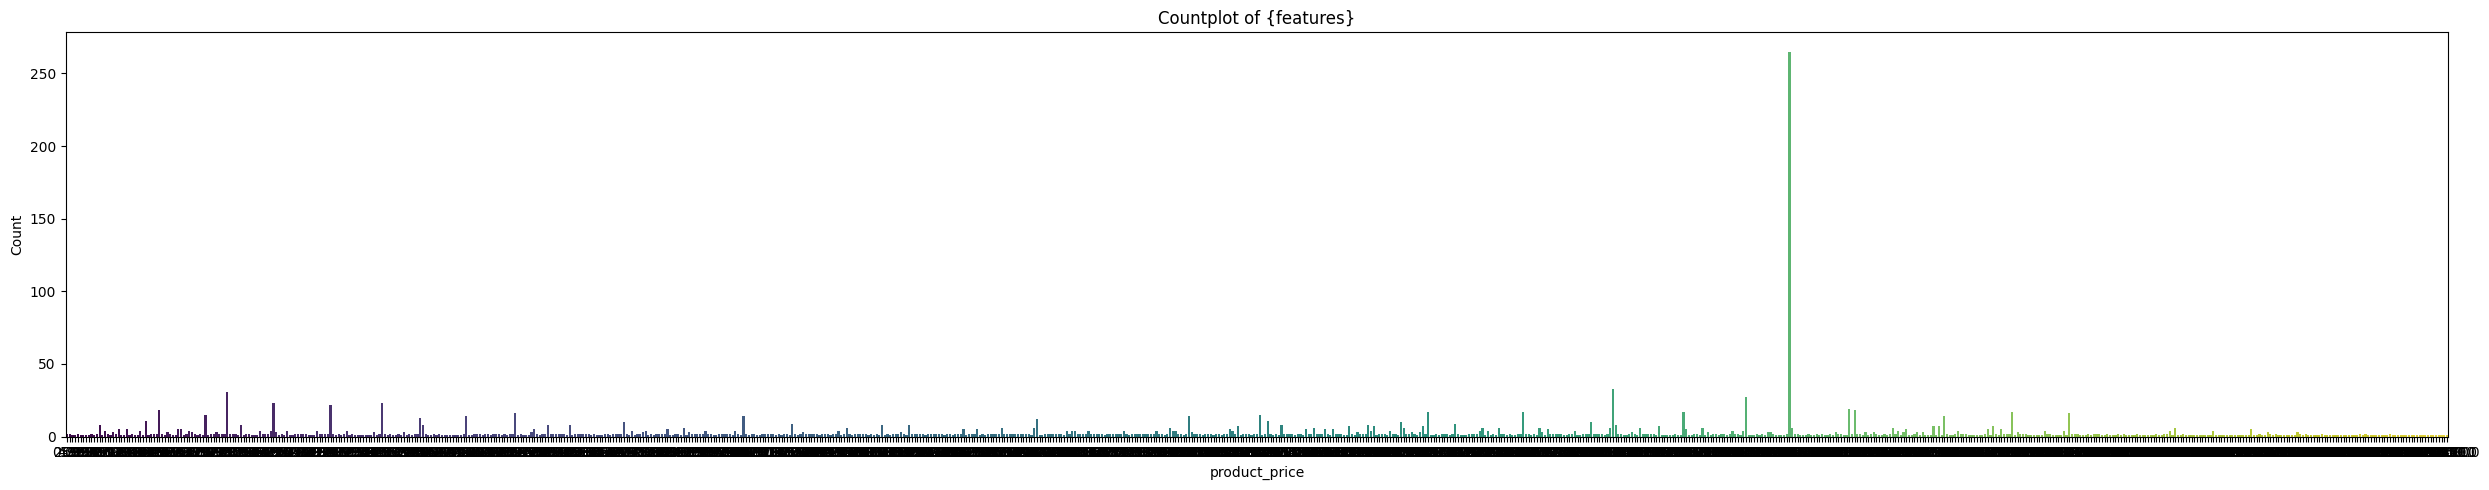

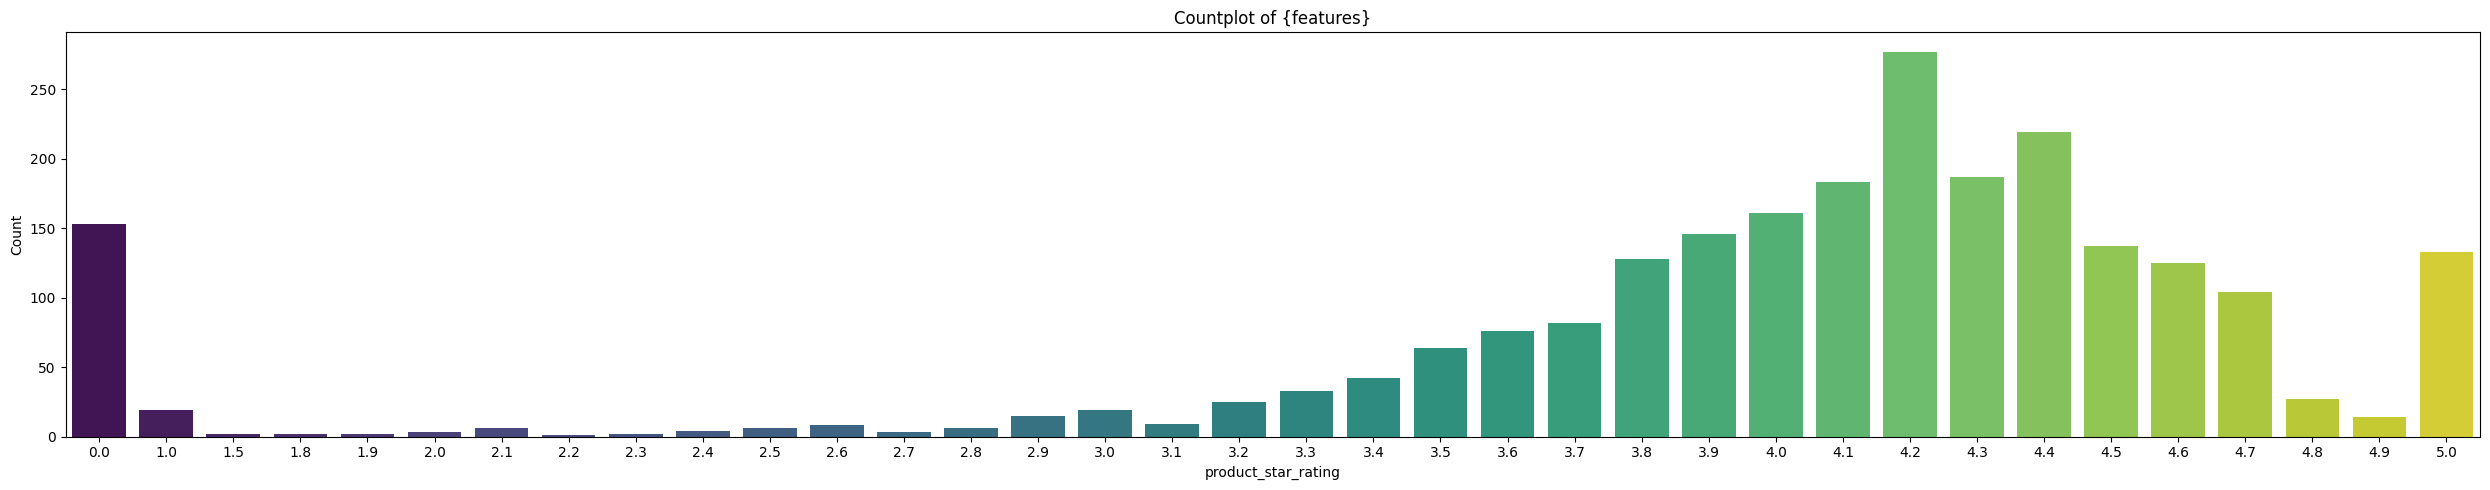

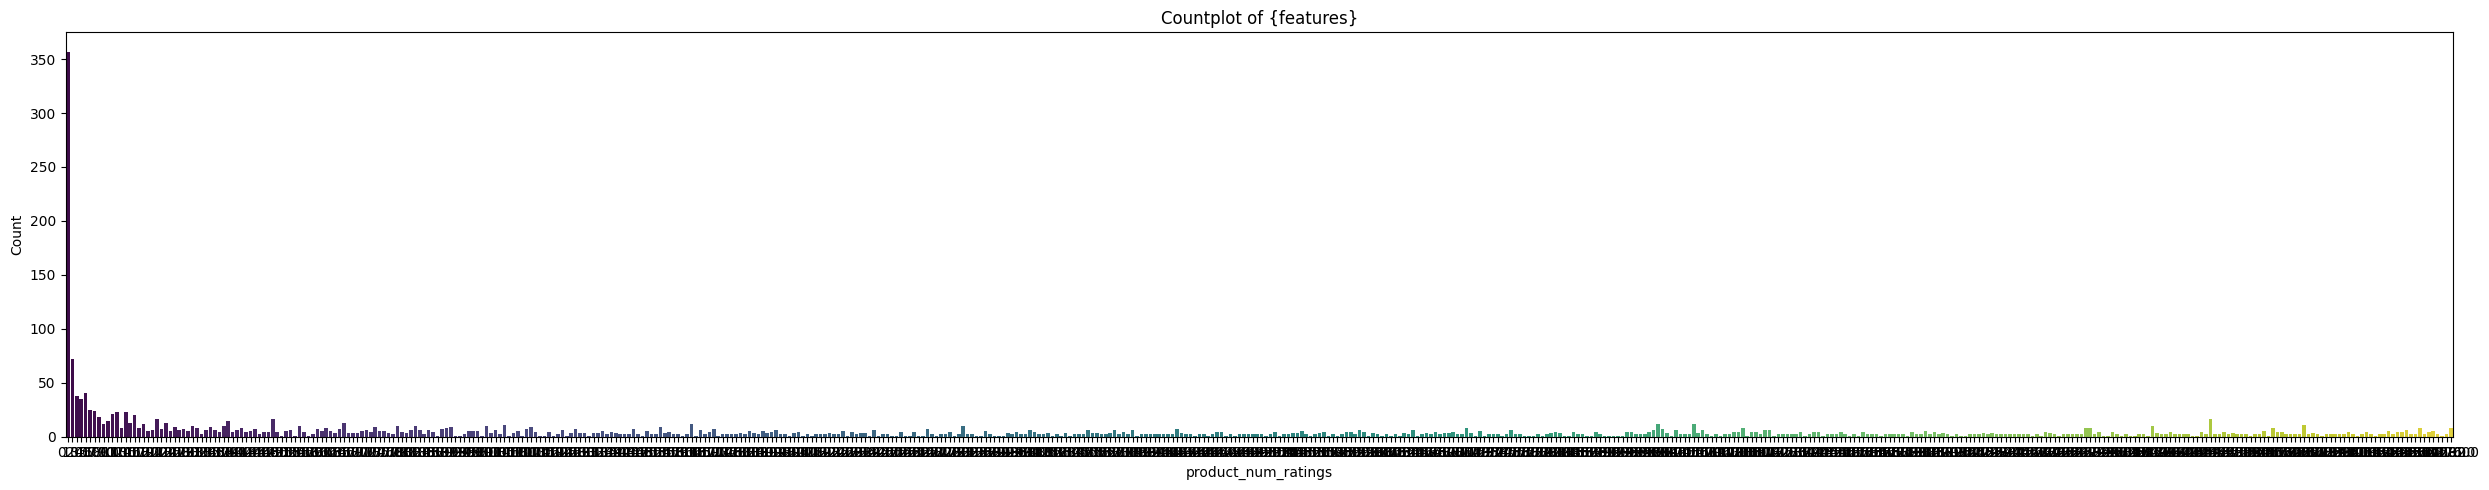

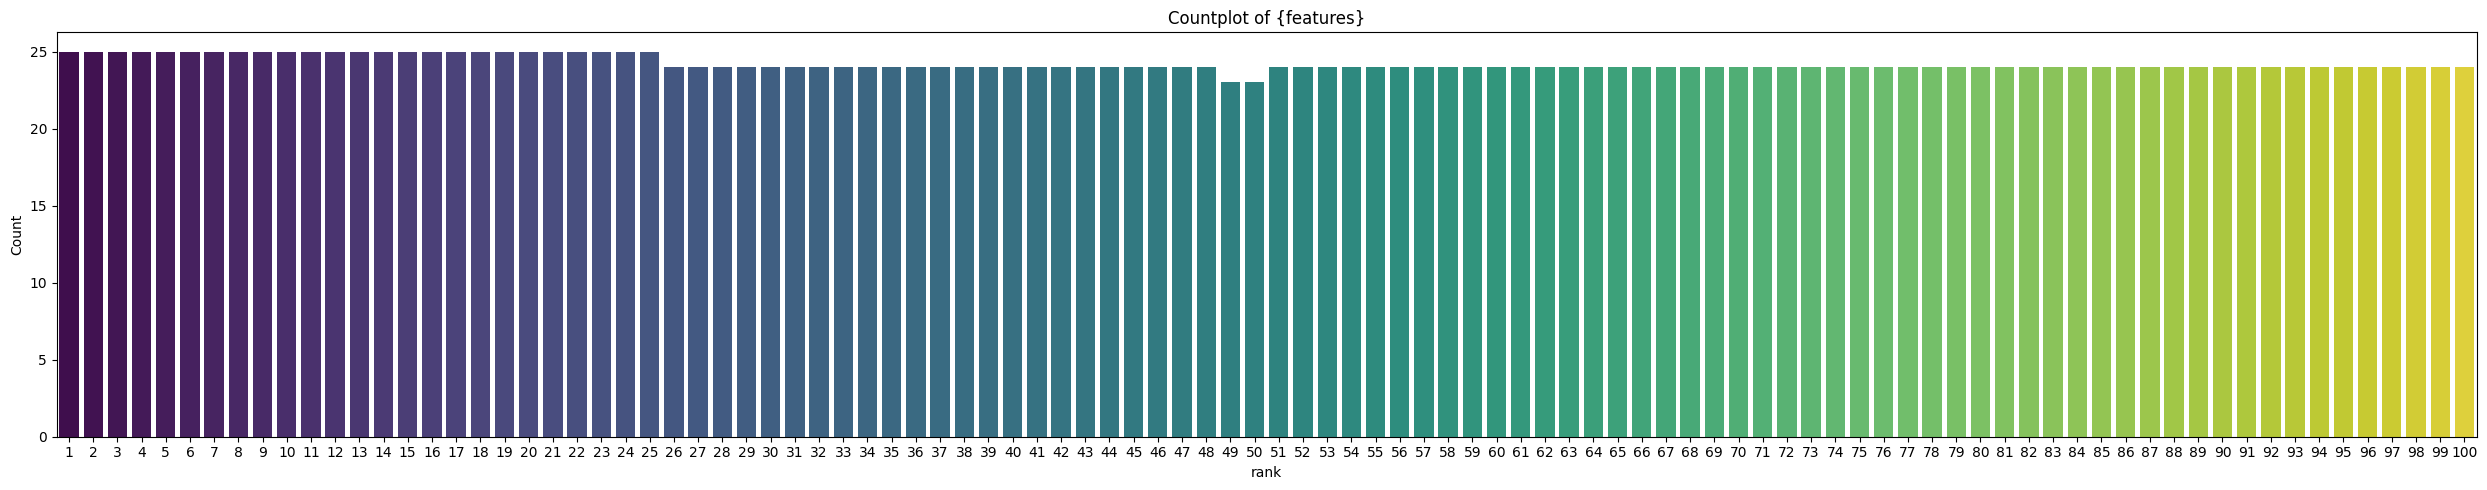

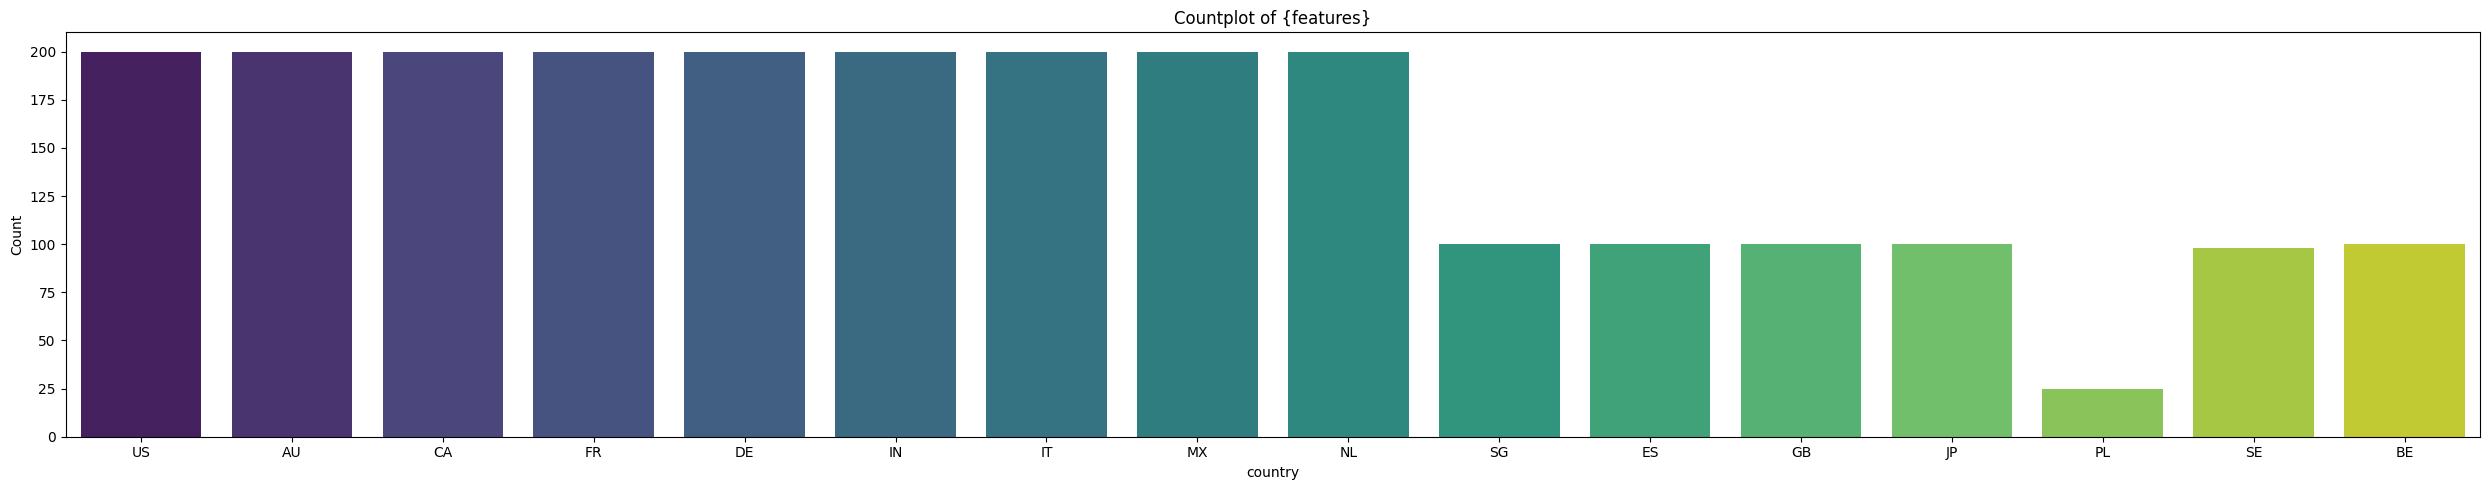

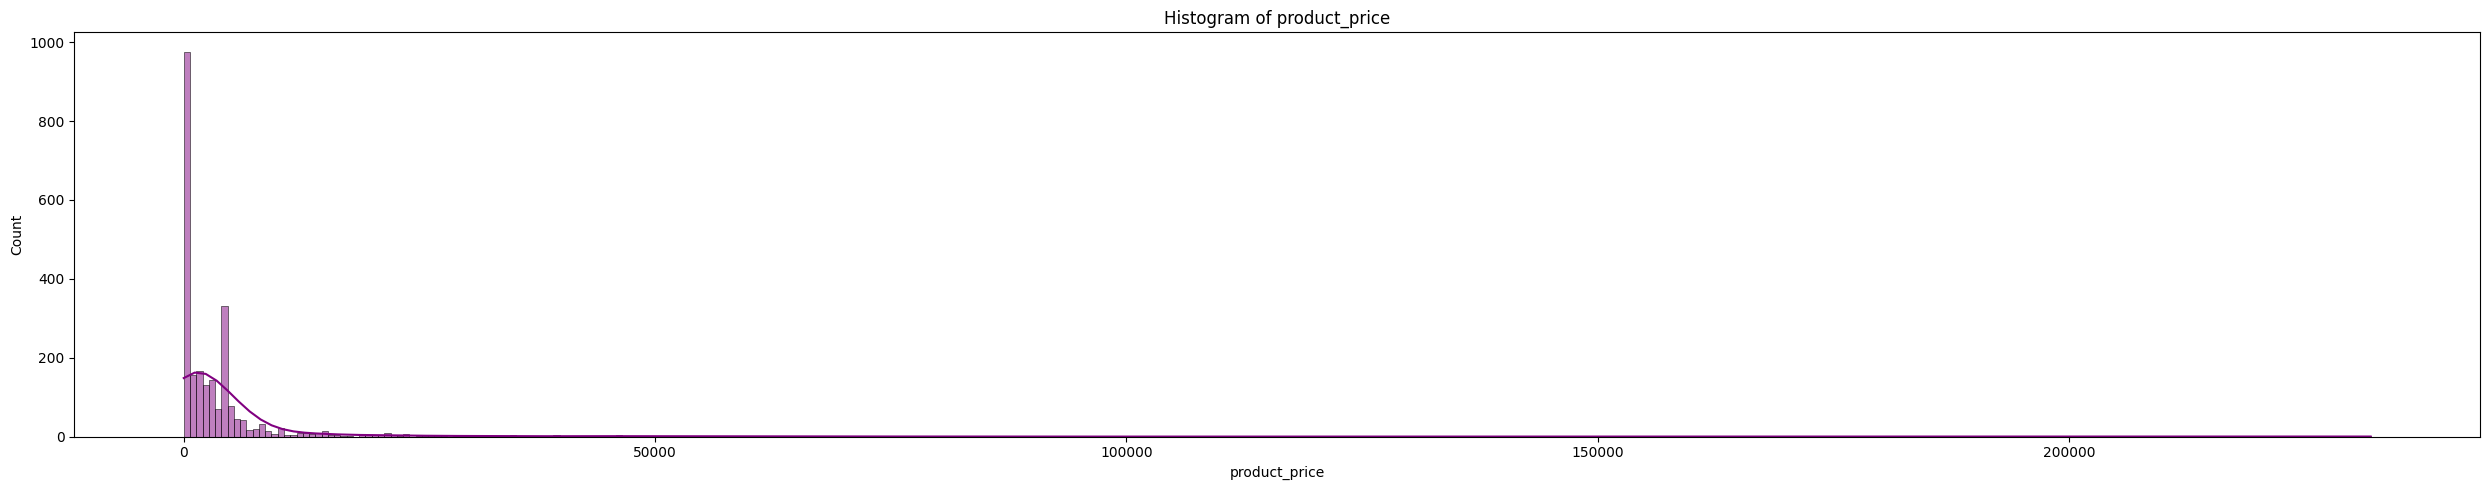

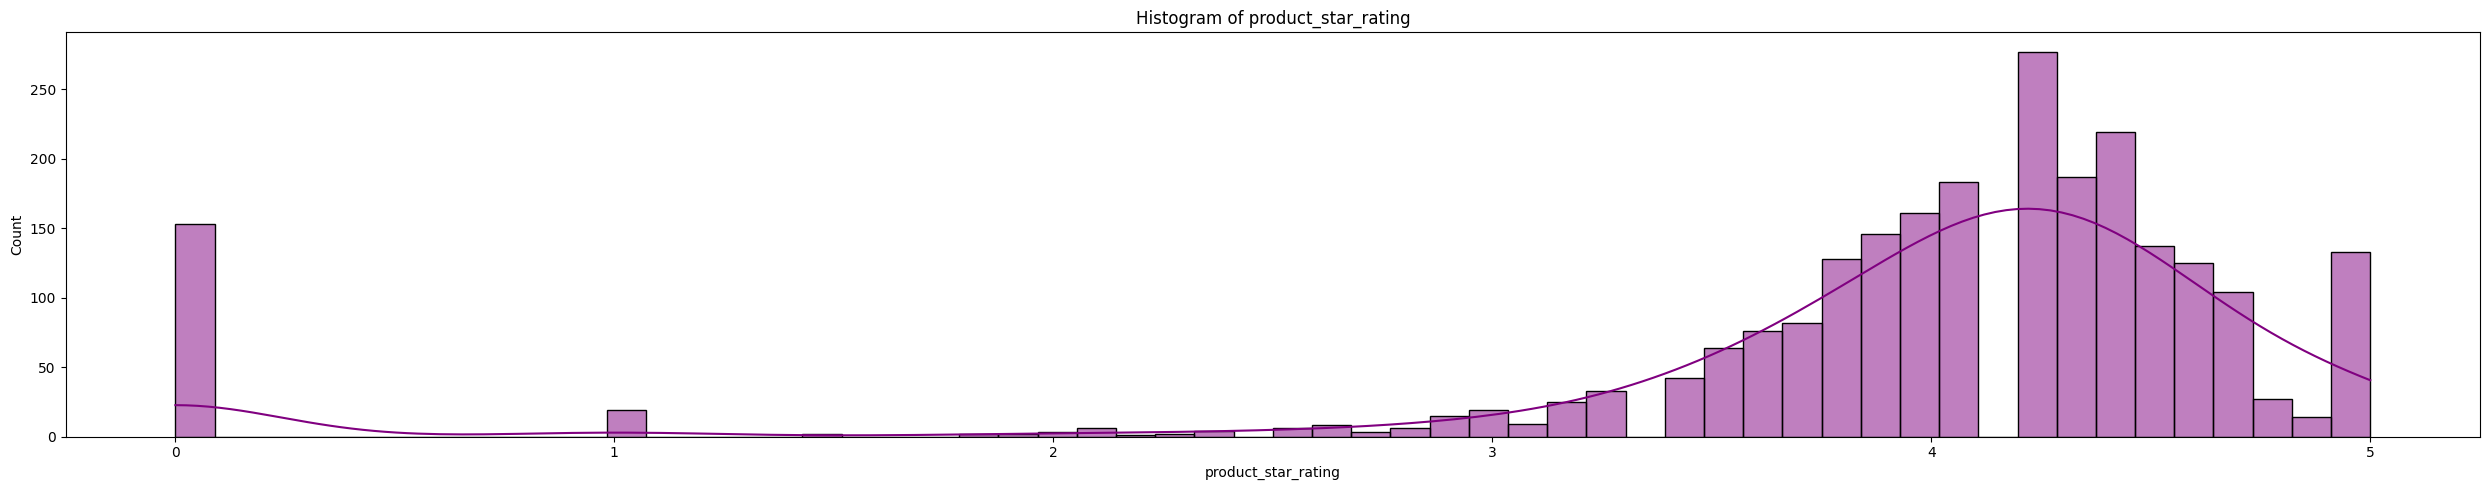

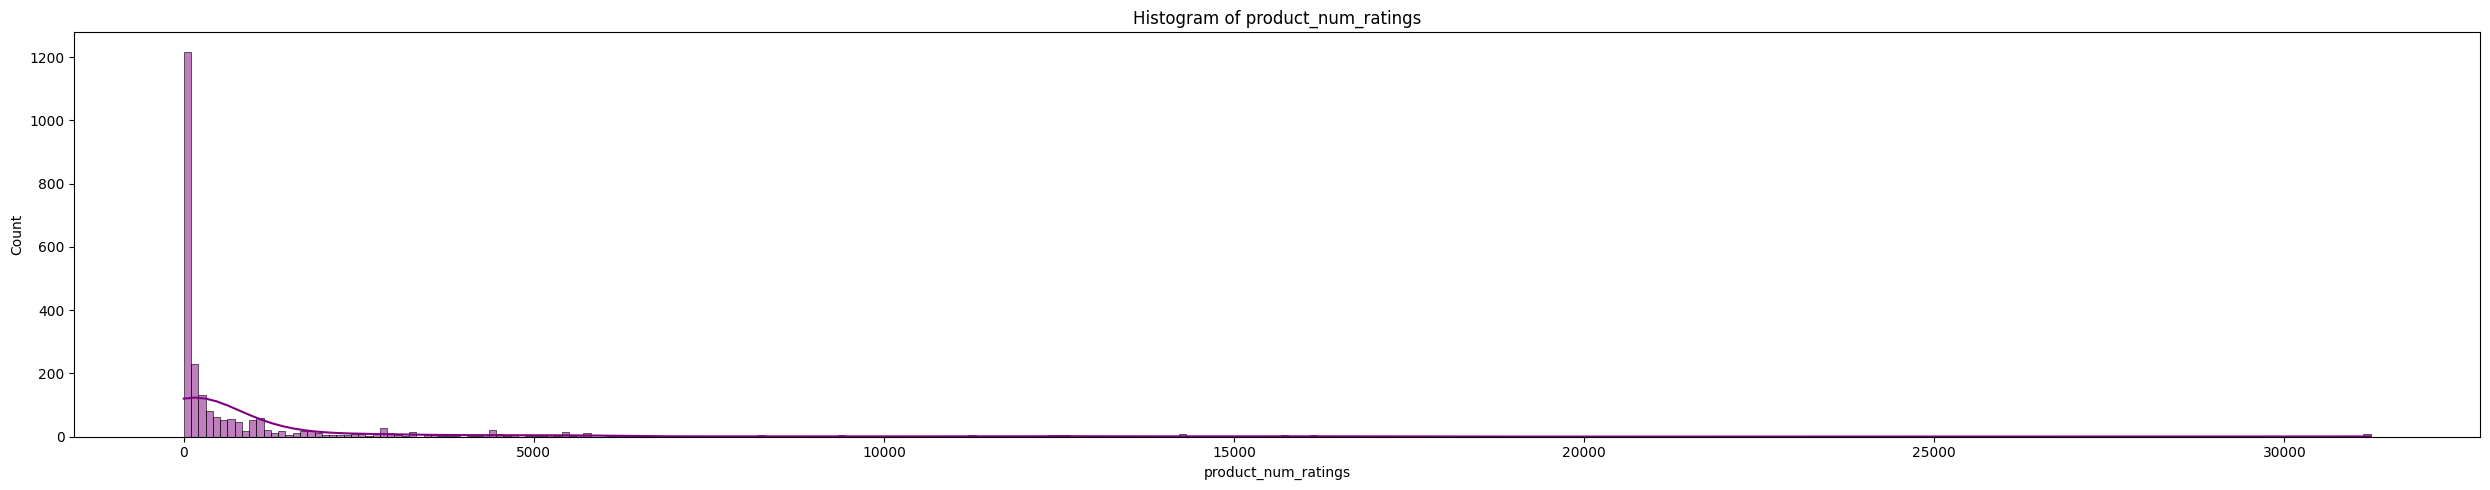

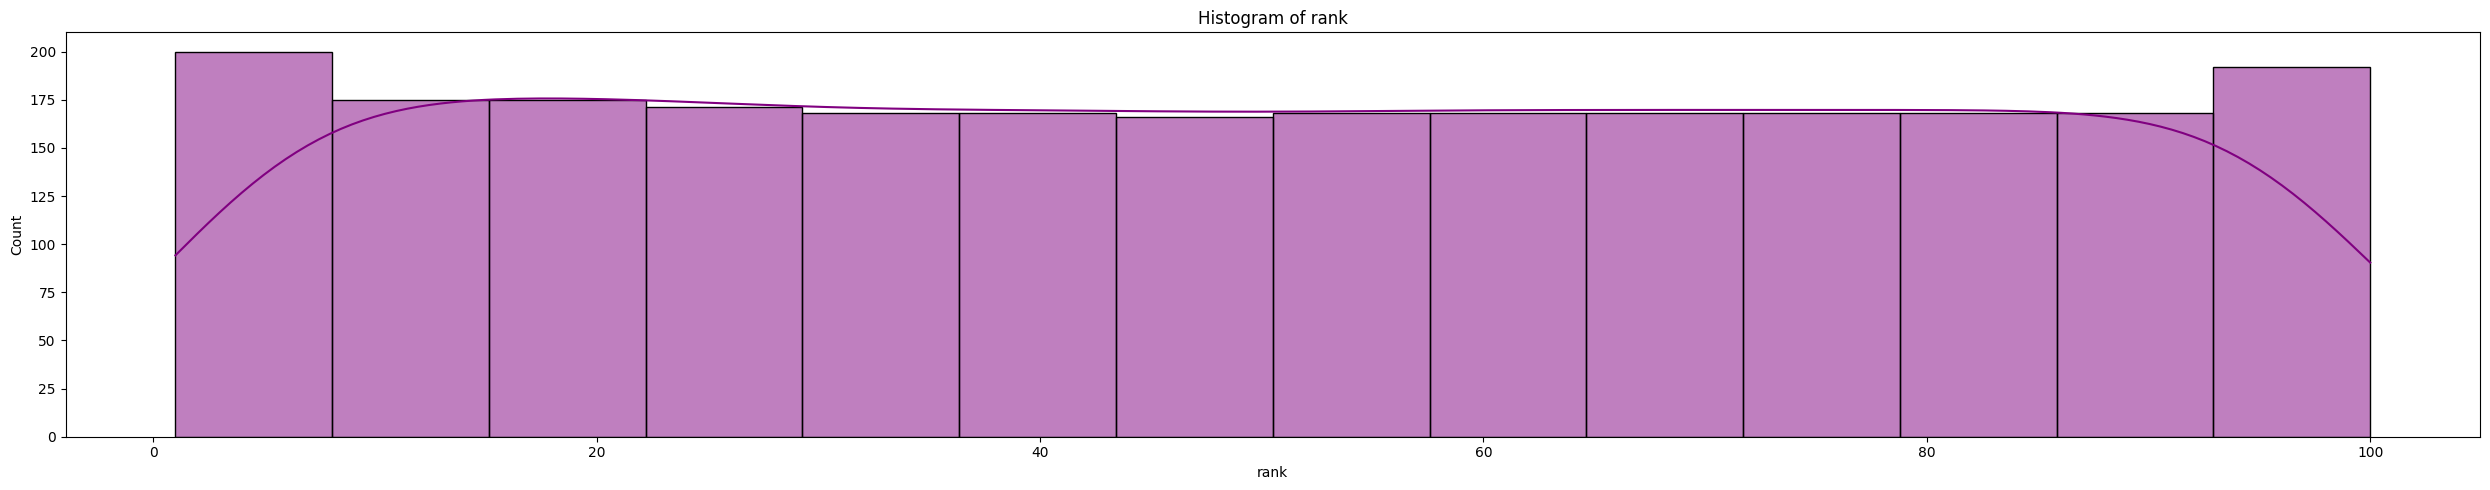

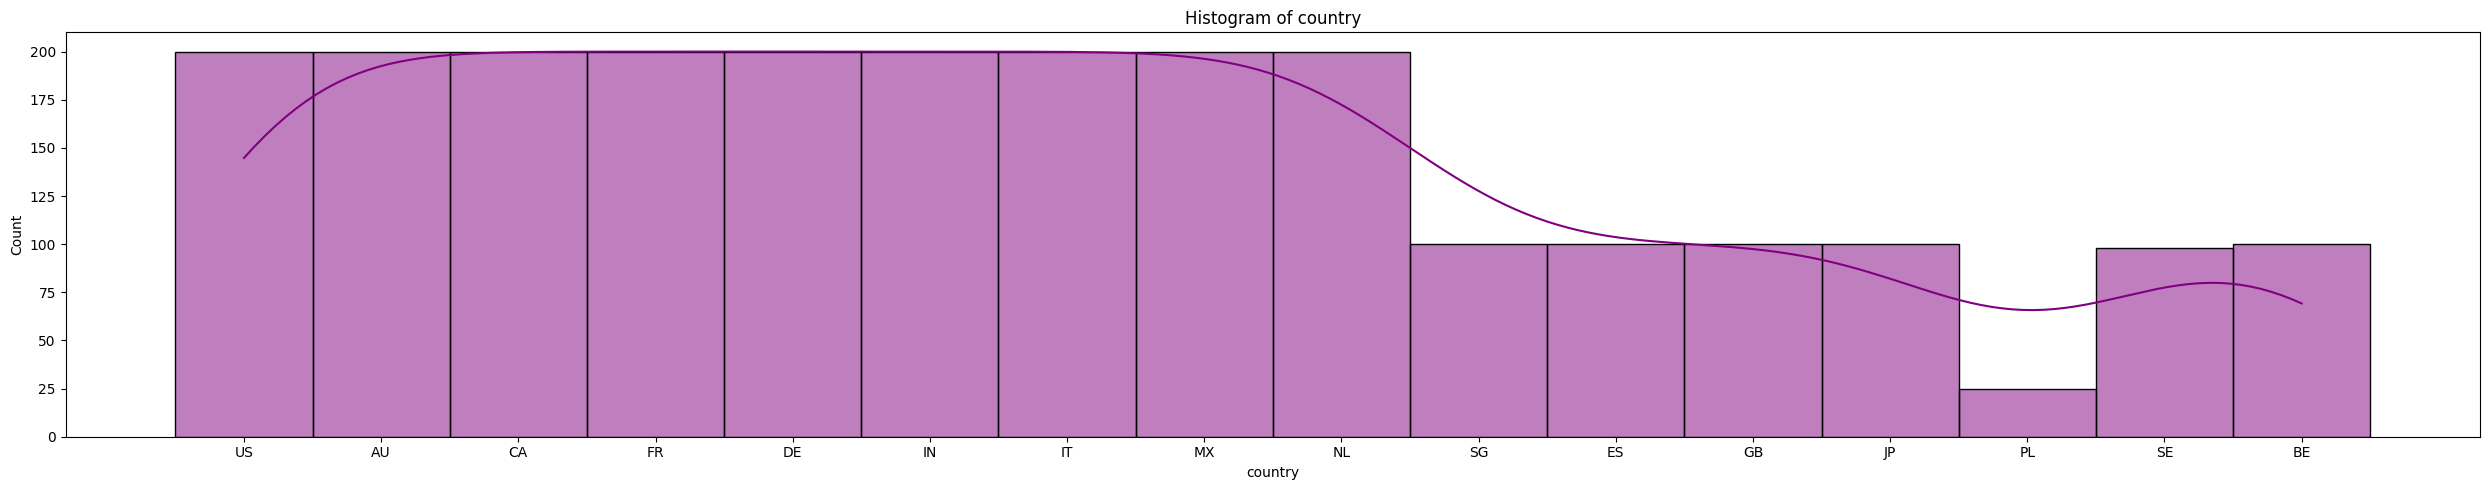

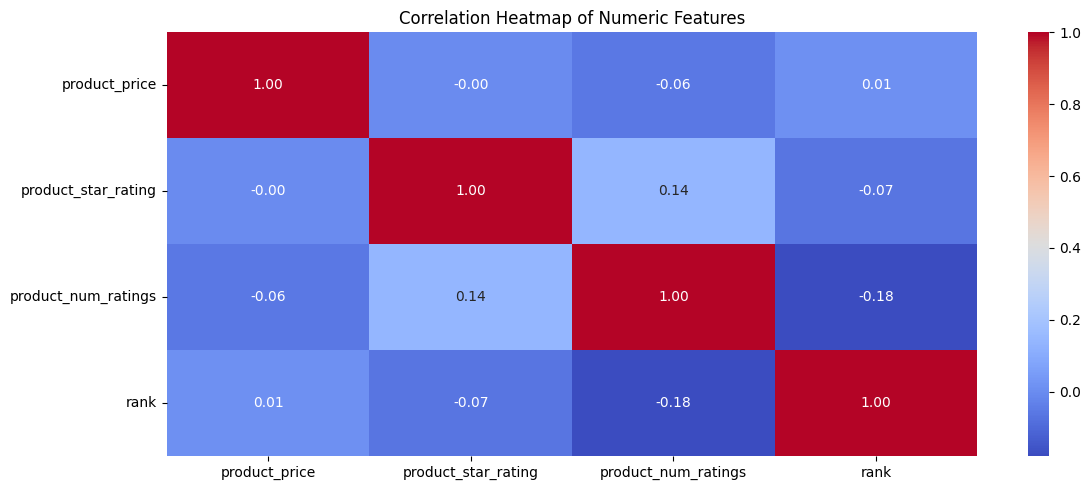

In [14]:
# COUNT PLOT

feat = ['product_price', 'product_star_rating',
       'product_num_ratings', 'rank', 'country']
for features in feat:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.countplot(x=features,data=df,palette ='viridis')
        plt.title('Countplot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        # plt.xticks(rotation='vertical')
        plt.tight_layout()
        plt.show()


for features in feat:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.histplot(df[features].dropna(),color='purple',kde=True)
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        # plt.xticks(rotation='vertical')
        plt.tight_layout()
        plt.show()





numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
        

In [15]:
df = df.drop(columns=['product_title','country'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_price        2423 non-null   float64
 1   product_star_rating  2423 non-null   float64
 2   product_num_ratings  2423 non-null   float64
 3   rank                 2423 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 75.8 KB


# MODEL

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [18]:
X = df.drop(columns=['rank'])
y = df['rank']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=500,criterion="friedman_mse",max_depth=500,max_features="log2",bootstrap=True,oob_score=True,verbose=2)

In [22]:
rf.fit(X_train,y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.5s


building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    1.2s


building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500


RandomForestRegressor(criterion='friedman_mse', max_depth=500,
                      max_features='log2', n_estimators=500, oob_score=True,
                      verbose=2)

In [23]:
y_pred_rf = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.1s


In [24]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE :", mae)
print("MSE :", mse)
print("R² Score :", r2*100)

MAE : 16.6139555957896
MSE : 474.3680681729296
R² Score : 43.11419276849403


# Conclusion:
> NEED MORE HYPER-PARAMETERTUENING